# Table of contents

### 1. Importing libraries and df
### 2. Data check
### 3. Kmeans clustering
### 4. Descriptive statistics
### 5. Next steps

## 1. Importing libraries and df

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define the folder path as a string
path = r'/Users/pamnouboussi/22.06.23 Achiev 6'

In [4]:
# Read the CSV file into a DataFrame and set the index column
air_quality = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'air_quality_cleaned_updated_wrangled.csv'), index_col=0)

## 2.Data check

In [5]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11959 entries, 0 to 11961
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region                                  11959 non-null  object 
 1   Country                                 11959 non-null  object 
 2   City/Town                               11959 non-null  object 
 3   Year                                    11959 non-null  int64  
 4   Number and type of monitoring stations  11891 non-null  object 
 5   PM2.5 Annual mean cleaned               11959 non-null  float64
 6   PM10 Annual mean cleaned                11959 non-null  float64
 7   Number of monitoring stations           11543 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 840.9+ KB


In [6]:
air_quality.head()

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0,1.0
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0,1.0
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0,1.0
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0,1.0
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0,1.0


elbow method

In [8]:
# Create subset of df to use for clustering, removing categorical variables
selected_columns = ['PM2.5 Annual mean cleaned', 'PM10 Annual mean cleaned']
subset_df = air_quality[selected_columns]

In [9]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(subset_df).score(subset_df) for i in range(len(kmeans))] 

score

[-13214395.8585166,
 -4515544.572799923,
 -2598049.2841983833,
 -1625465.88827006,
 -1166108.8381491157,
 -915105.4021909339,
 -760547.193239512,
 -639925.8452173148,
 -555837.743421253]

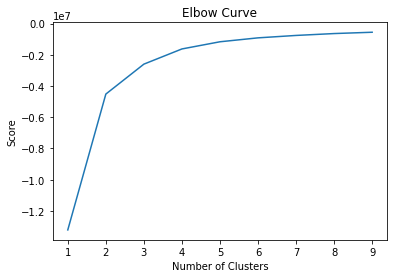

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters would be 3 

## 3.K means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data.

kmeans.fit(subset_df)

KMeans(n_clusters=3)

In [20]:
subset_df ['clusters'] = kmeans.fit_predict(subset_df)

/var/folders/0z/t3bl92zd6hq1w5_vfd3ll2dw0000gn/T/ipykernel_70120/701907175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df ['clusters'] = kmeans.fit_predict(subset_df)


In [28]:
#perform k means clusturing on subset of df
# Add the cluster labels to the original DataFrame

num_clusters = 3  # Define the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(subset_df)

air_quality['Clusters'] = cluster_labels

In [23]:
#errorcheck
air_quality.head()

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations,Cluster
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0,1.0,2
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0,1.0,0
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0,1.0,0
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0,1.0,0
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0,1.0,0


In [29]:
#
air_quality['Clusters'].value_counts()

0    10214
2     1409
1      336
Name: Clusters, dtype: int64

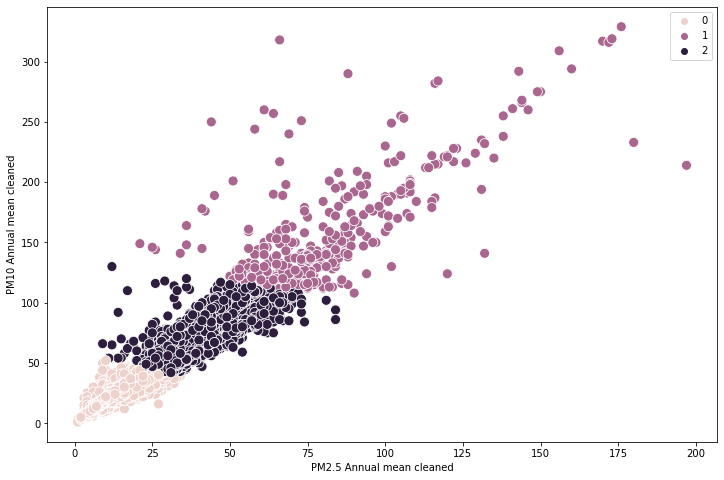

In [36]:
#plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=air_quality['PM2.5 Annual mean cleaned'], y=air_quality['PM10 Annual mean cleaned'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PM2.5 Annual mean cleaned') # Label x-axis.
plt.ylabel('PM10 Annual mean cleaned') # Label y-axis.
plt.show()

## 4. Descriptive statistics

In [40]:
# Group the data by cluster
cluster_groups = air_quality.groupby('Cluster')

# Calculate descriptive statistics for each cluster
cluster_stats = cluster_groups['PM2.5 Annual mean cleaned', 'PM10 Annual mean cleaned'].describe()

/var/folders/0z/t3bl92zd6hq1w5_vfd3ll2dw0000gn/T/ipykernel_70120/4072214854.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_stats = cluster_groups['PM2.5 Annual mean cleaned', 'PM10 Annual mean cleaned'].describe()


In [41]:
# Group data by cluster
cluster_groups = air_quality.groupby('Cluster')

# Select the columns for descriptive stats
selected_columns = ['PM2.5 Annual mean cleaned', 'PM10 Annual mean cleaned']

# Calculate descriptive stats for each cluster
cluster_stats = cluster_groups[selected_columns].describe()

# Print the descriptive stas
cluster_stats


PM2.5 Annual mean cleaned                                          \
                            count       mean        std   min   25%   50%   
Cluster                                                                     
0                         10214.0  13.279127   5.400001   1.0   9.0  13.0   
1                           336.0  82.229167  26.524973  21.0  65.0  76.0   
2                          1409.0  37.179560  12.184646   9.0  28.0  34.0   

                     PM10 Annual mean cleaned                                \
          75%    max                    count        mean        std    min   
Cluster                                                                       
0        16.0   34.0                  10214.0   21.387801   7.685567    1.0   
1        93.0  197.0                    336.0  160.982143  46.577424  108.0   
2        45.0   84.0                   1409.0   67.377573  19.319295   41.0   

                                     
           25%    50%    75%    max  
Cluster                              
0         16.0   20.0   25.0   52.0  
1        126.0  144.5  184.5  329.0  
2         51.0   63.0   81.0  130.0

## 5. Next steps: Propose what these results could be useful for in future steps of an analytics pipeline.

#### - They allow us to undertand the average and variability of the variables within each cluster. we can use this to characterise each cluster based on air quality levels. Cluster 1 exhibits higher levels of PM2.5 and PM10 compared to the other clusters, indicating potentially worse air quality.

#### - Outliers can be identied by looking at the minum and maximum values for variables within each cluster

#### - Clusters can be compared. Cluster 1 has substantially higher mean values for both PM2.5 and PM10 compared to the other clusters. comparisons between the clusters will help us identify clusters with similar or disimilar paterns.
